# STEP 1
- Install the dependencies to develop the exercise.

In [23]:
%pip install kagglehub pandas matplotlib seaborn  



Note: you may need to restart the kernel to use updated packages.


- load the dataframe with pandas.

In [24]:
import kagglehub
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("neurocipher/heartdisease")

print("Path to dataset files:", path)

df = pd.read_csv(f"{path}/Heart_Disease_Prediction.csv")

print(df.head())


Path to dataset files: C:\Users\migue\.cache\kagglehub\datasets\neurocipher\heartdisease\versions\1
   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         

- Binarize the target column presence = 1 y absence = 0.

In [25]:
# binarize the target column
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})
print(df.head())

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium  Heart Disease  
0                        3         3              1  
1                        0         7              0  
2                        0

## EDA: 
1. Sumarry stats:

In [26]:
df.info()
df.describe(include="all")

<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


- Information about each piece of data is displayed, such as its type, the count of non-null elements, the column name, and the order.
- The other table shows data such as the total for each column, the mean, the standard deviation, the minimum and maximum values, where the behavior of each characteristic can be seen.

2. Handle missing


In [27]:
df.isnull().sum()
df.isnull().mean() * 100


Age                        0.0
Sex                        0.0
Chest pain type            0.0
BP                         0.0
Cholesterol                0.0
FBS over 120               0.0
EKG results                0.0
Max HR                     0.0
Exercise angina            0.0
ST depression              0.0
Slope of ST                0.0
Number of vessels fluro    0.0
Thallium                   0.0
Heart Disease              0.0
dtype: float64

If you find null values, there are several possible solutions, depending on the number of null values.
- You can delete the row.
- Fill in with the mode.
- Fill in with the mean.

All this is done with the intention of keeping the data clean and ensuring that no data relevant to the sample is lost.

The mean method is used.

In [28]:
columnas = df.columns
for col in df.columns:
    df[col] = df[col].fillna(df[col].mean())


Note: In this case the data does not have nulls.

3. Handle outliers

- The interquartile range method is used. 

Age: 0 outliers
Sex: 0 outliers
Chest pain type: 20 outliers
BP: 9 outliers
Cholesterol: 5 outliers
FBS over 120: 40 outliers
EKG results: 0 outliers
Max HR: 1 outliers
Exercise angina: 0 outliers
ST depression: 4 outliers
Slope of ST: 0 outliers
Number of vessels fluro: 19 outliers
Thallium: 0 outliers
Heart Disease: 0 outliers


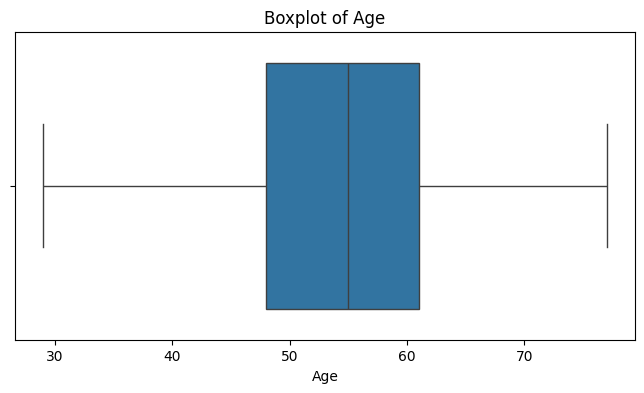

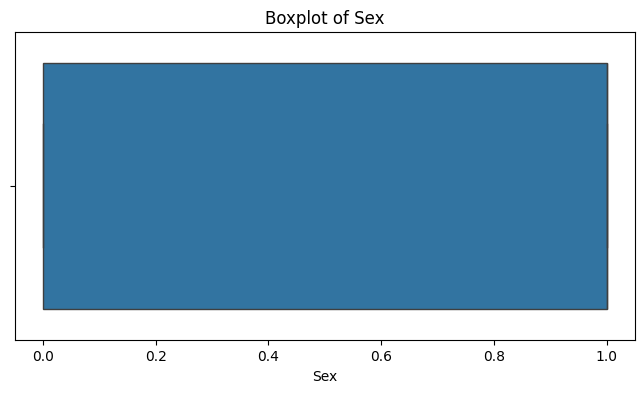

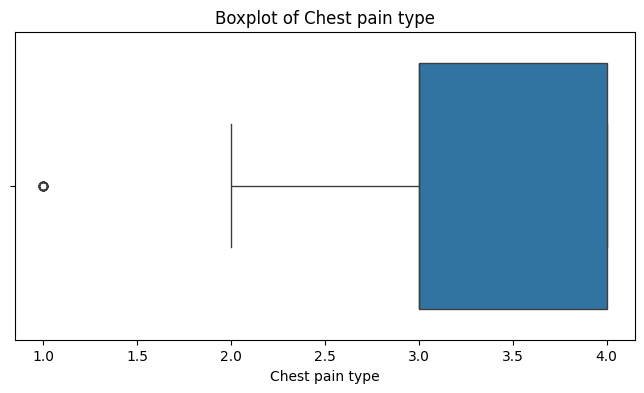

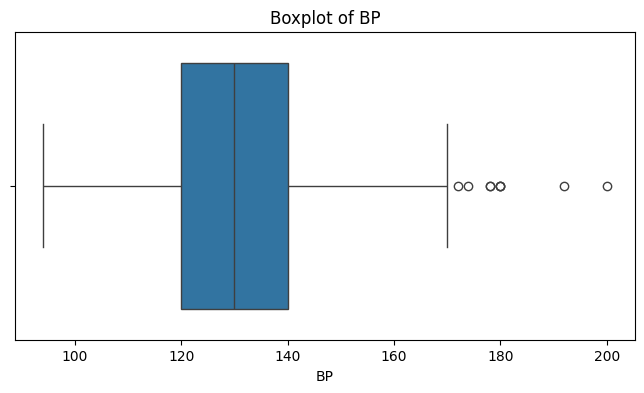

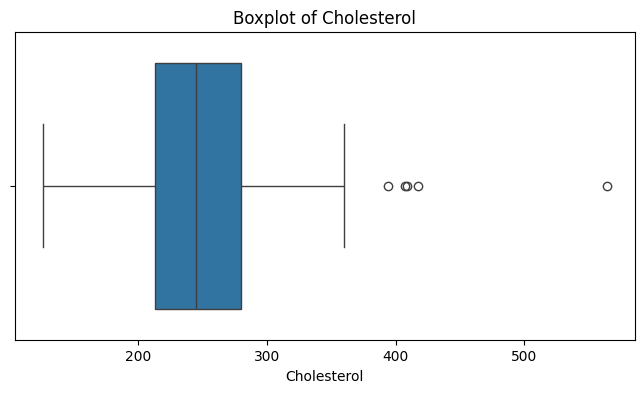

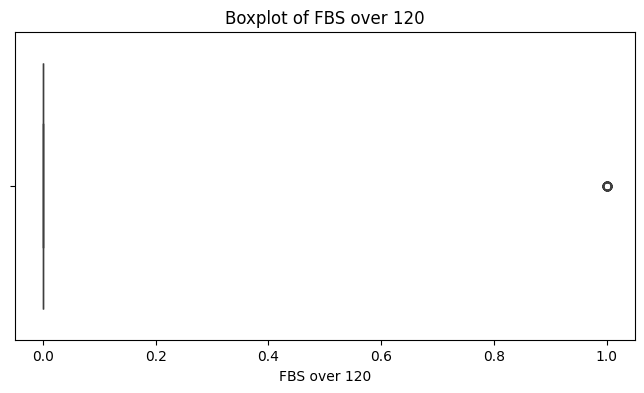

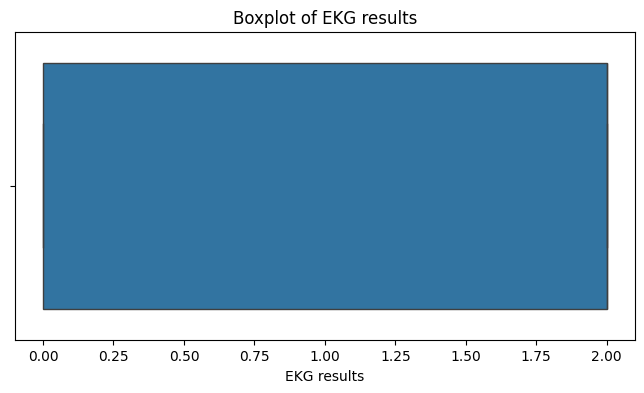

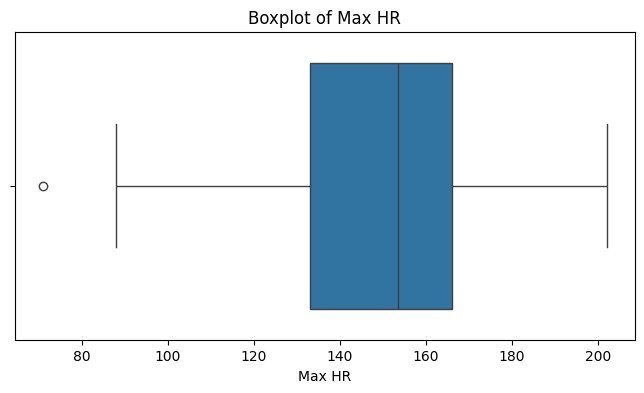

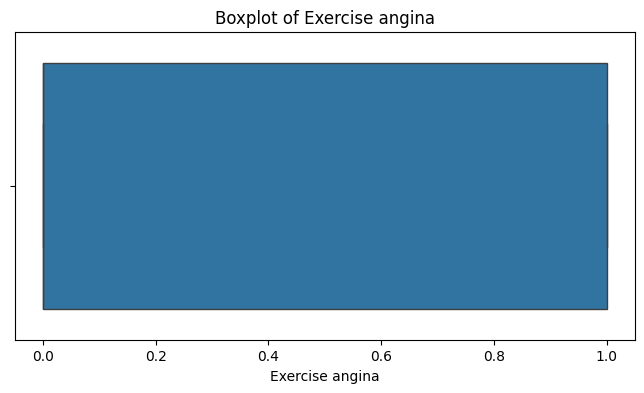

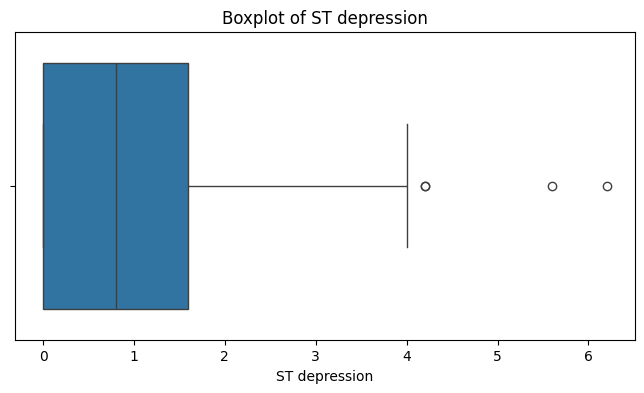

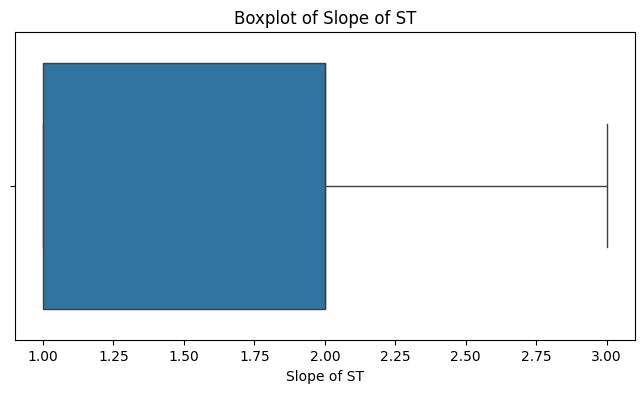

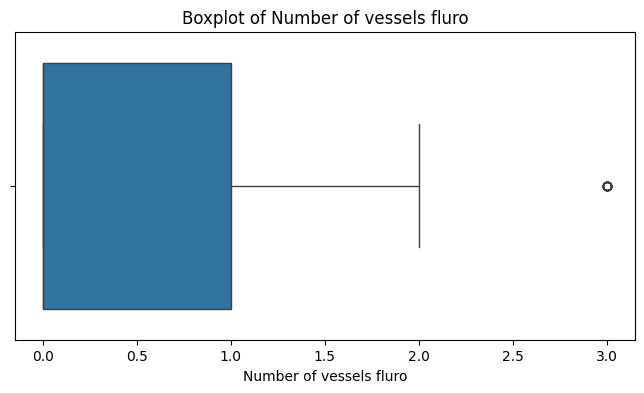

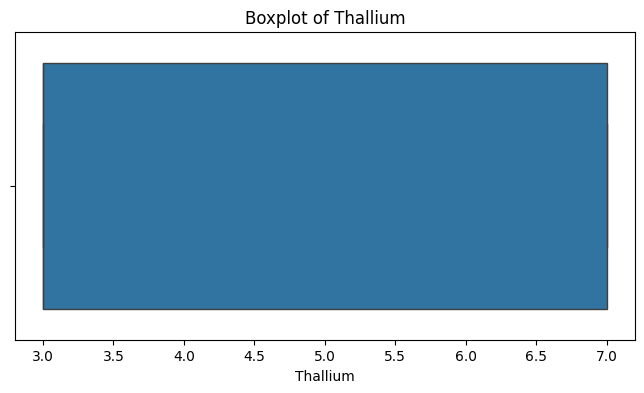

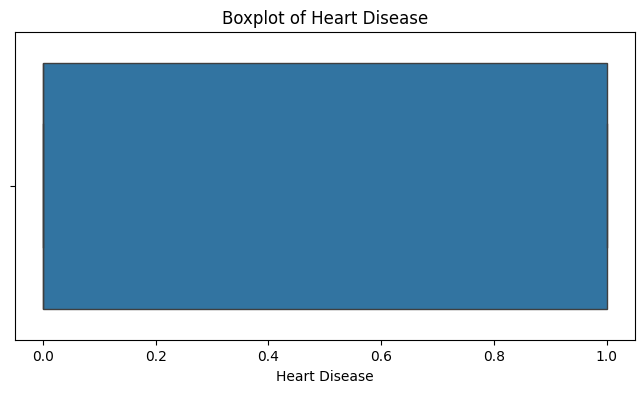

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

columnas = df.columns
for col in df.columns:   
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[(df[col] < Q1 - 1.5*IQR) | 
                (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')


In this case, the data is left as is so that it does not affect the problem.

## PREP
- 70% to train.
- 30% to test.


In [30]:
# Mezclar el dataset
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Calcular índice de corte
split = int(0.7 * len(df_shuffled))

# Separar train y test
train_df = df_shuffled.iloc[:split]
test_df = df_shuffled.iloc[split:]

print("Train size:", train_df.shape)
print("Test size:", test_df.shape)

# Separar X e y
X_train = train_df.drop('Heart Disease', axis=1)
y_train = train_df['Heart Disease']

X_test = test_df.drop('Heart Disease', axis=1)
y_test = test_df['Heart Disease']

Train size: (189, 14)
Test size: (81, 14)


# Step 2


Iteración    0: Costo 0.689606
Iteración  100: Costo 0.491601
Iteración  200: Costo 0.421239
Iteración  300: Costo 0.386591
Iteración  400: Costo 0.366052
Iteración  500: Costo 0.352444
Iteración  600: Costo 0.342742
Iteración  700: Costo 0.335458
Iteración  800: Costo 0.329776
Iteración  900: Costo 0.325214
Iteración 1000: Costo 0.321466
Iteración 1100: Costo 0.318330
Iteración 1200: Costo 0.315667
Iteración 1300: Costo 0.313379
Iteración 1400: Costo 0.311393


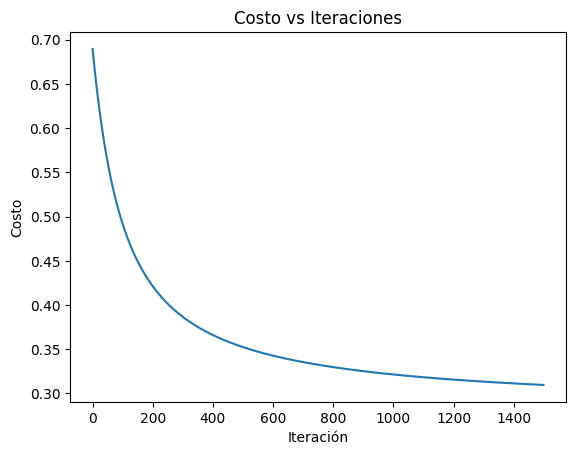

Métrica      | Train    | Test    
-----------------------------------
Accuracy     | 0.8783   | 0.8025
Precision    | 0.8608   | 0.8158
Recall       | 0.8500   | 0.7750
F1-Score     | 0.8553   | 0.7949


In [31]:
def sigmoid(z):
    """Calcula la función sigmoide."""
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, w, b):
    """
    Calcula el costo de entropía cruzada binaria.
    """
    m = X.shape[0]
    f_wb = sigmoid(np.dot(X, w) + b)
    
    cost = -(1/m) * np.sum(y * np.log(f_wb + 1e-15) + (1 - y) * np.log(1 - f_wb + 1e-15))
    return cost

def compute_gradient(X, y, w, b):
    """
    Calcula los gradientes para w y b.
    """
    m, n = X.shape
    f_wb = sigmoid(np.dot(X, w) + b)
    err = f_wb - y
    
    dj_dw = (1/m) * np.dot(X.T, err)
    dj_db = (1/m) * np.sum(err)
    
    return dj_dw, dj_db

def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    Ejecuta el descenso de gradiente y rastrea el historial de costos.
    """
    J_history = []
    w = w_in
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i < 100000: 
            J_history.append(compute_cost(X, y, w, b))
            
        if i % 100 == 0:
            print(f"Iteración {i:4d}: Costo {J_history[-1]:.6f}")
            
    return w, b, J_history

X_train_scaled = (X_train - X_train.mean()) / X_train.std()
X_test_scaled = (X_test - X_train.mean()) / X_train.std()

initial_w = np.zeros(X_train.shape[1])
initial_b = 0.
alpha = 0.01
iters = 1500

w_final, b_final, cost_hist = gradient_descent(X_train_scaled.values, y_train.values, initial_w, initial_b, alpha, iters)


import matplotlib.pyplot as plt
plt.plot(cost_hist)
plt.title("Costo vs Iteraciones")
plt.xlabel("Iteración")
plt.ylabel("Costo")
plt.show()


def predict(X, w, b):
    return (sigmoid(np.dot(X, w) + b) >= 0.5).astype(int)

def evaluate_metrics(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    acc = (tp + tn) / len(y_true)
    prec = tp / (tp + fp) if (tp + fp) > 0 else 0
    rec = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0
    return acc, prec, rec, f1

train_preds = predict(X_train_scaled, w_final, b_final)
test_preds = predict(X_test_scaled, w_final, b_final)

m_train = evaluate_metrics(y_train, train_preds)
m_test = evaluate_metrics(y_test, test_preds)

print(f"{'Métrica':<12} | {'Train':<8} | {'Test':<8}")
print("-" * 35)
for name, tr, te in zip(['Accuracy', 'Precision', 'Recall', 'F1-Score'], m_train, m_test):
    print(f"{name:<12} | {tr:.4f}   | {te:.4f}")

# STEP 3

Iteración    0: Costo 0.690876
Iteración  100: Costo 0.651290
Iteración  200: Costo 0.651008
Iteración  300: Costo 0.651005
Iteración  400: Costo 0.651005
Iteración  500: Costo 0.651005
Iteración  600: Costo 0.651005
Iteración  700: Costo 0.651005
Iteración  800: Costo 0.651005
Iteración  900: Costo 0.651005


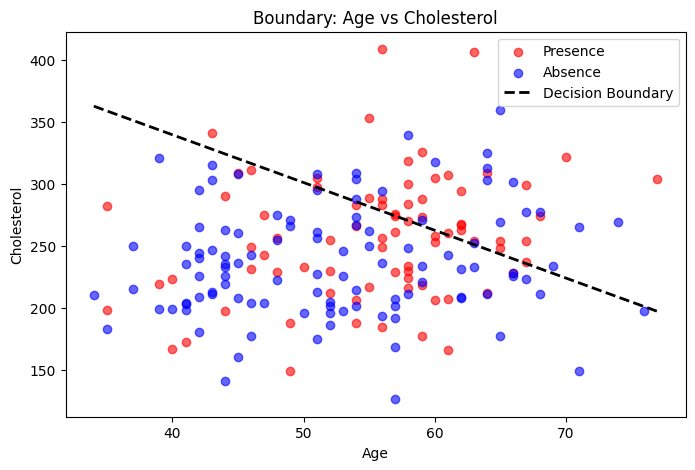

Iteración    0: Costo 0.688378
Iteración  100: Costo 0.589980
Iteración  200: Costo 0.587787
Iteración  300: Costo 0.587693
Iteración  400: Costo 0.587688
Iteración  500: Costo 0.587688
Iteración  600: Costo 0.587688
Iteración  700: Costo 0.587688
Iteración  800: Costo 0.587688
Iteración  900: Costo 0.587688


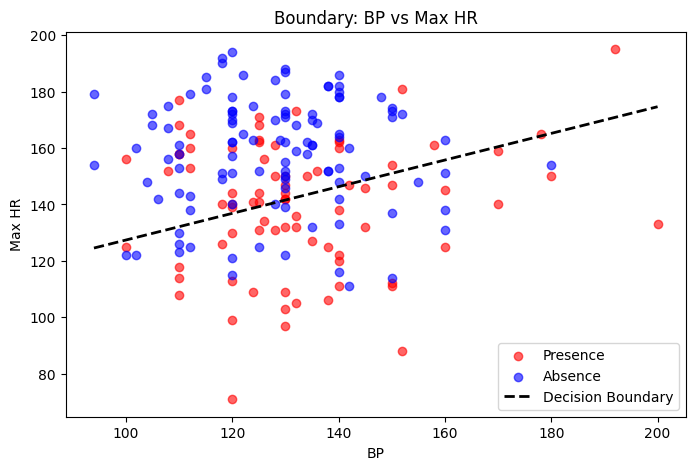

Iteración    0: Costo 0.684210
Iteración  100: Costo 0.523866
Iteración  200: Costo 0.519741
Iteración  300: Costo 0.519410
Iteración  400: Costo 0.519376
Iteración  500: Costo 0.519372
Iteración  600: Costo 0.519372
Iteración  700: Costo 0.519372
Iteración  800: Costo 0.519372
Iteración  900: Costo 0.519372


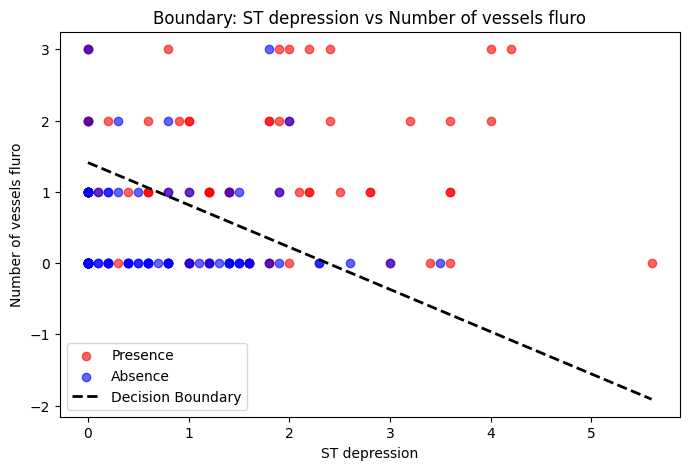

In [32]:
# STEP 3: Visualize Decision Boundaries

# Definimos los pares de características
feature_pairs = [('Age', 'Cholesterol'), ('BP', 'Max HR'), ('ST depression', 'Number of vessels fluro')]

def plot_boundary(X_pair, y, pair_names):
    # 1. Escalar los datos del par para que el GD converja rápido
    X_mean = X_pair.mean()
    X_std = X_pair.std()
    X_s = (X_pair - X_mean) / X_std
    
    # 2. Entrenar modelo 2D específico para este par
    # Usamos las funciones de entrenamiento definidas en el Step 2
    w_2d, b_2d, _ = gradient_descent(X_s.values, y.values, np.zeros(2), 0., 0.1, 1000)
    
    # 3. Graficar puntos
    plt.figure(figsize=(8, 5))
    mask = (y == 1)
    plt.scatter(X_pair.iloc[:,0][mask], X_pair.iloc[:,1][mask], c='red', label='Presence', alpha=0.6)
    plt.scatter(X_pair.iloc[:,0][~mask], X_pair.iloc[:,1][~mask], c='blue', label='Absence', alpha=0.6)
    
    # 4. Calcular la línea de decisión
    # La frontera es: w1*x1_s + w2*x2_s + b = 0
    # Despejamos x2_s: x2_s = (-b - w1*x1_s) / w2
    
    x1_min, x1_max = X_pair.iloc[:,0].min(), X_pair.iloc[:,0].max()
    x1_vals = np.array([x1_min, x1_max])
    
    # Escalar x1 para el cálculo (usando .iloc[0] para evitar el KeyError)
    x1_s = (x1_vals - X_mean.iloc[0]) / X_std.iloc[0]
    
    # Calcular x2 escalado
    x2_s = (-b_2d - w_2d[0] * x1_s) / w_2d[1]
    
    # Des-escalar x2 para volver a las unidades originales de la gráfica
    x2_vals = x2_s * X_std.iloc[1] + X_mean.iloc[1]
    
    plt.plot(x1_vals, x2_vals, "--k", label="Decision Boundary", linewidth=2)
    plt.xlabel(pair_names[0])
    plt.ylabel(pair_names[1])
    plt.legend()
    plt.title(f"Boundary: {pair_names[0]} vs {pair_names[1]}")
    plt.show()

# Ejecutar visualización
for p in feature_pairs:
    plot_boundary(X_train[list(p)], y_train, p)

# Step 4

In [33]:

def compute_cost_reg(X, y, w, b, lambda_):
    m = X.shape[0]
    cost = compute_cost(X, y, w, b) 
    reg_cost = (lambda_ / (2 * m)) * np.sum(np.square(w))
    return cost + reg_cost

def compute_gradient_reg(X, y, w, b, lambda_):
    m = X.shape[0]
    dj_dw, dj_db = compute_gradient(X, y, w, b) 
    
    
    dj_dw_reg = dj_dw + (lambda_ / m) * w
    
    return dj_dw_reg, dj_db

def gradient_descent_reg(X, y, w_in, b_in, alpha, num_iters, lambda_):
    w, b = w_in, b_in
    cost_history = []
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_reg(X, y, w, b, lambda_)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i < 10000: cost_history.append(compute_cost_reg(X, y, w, b, lambda_))
            
    return w, b, cost_history


lambdas = [0, 0.001, 0.01, 0.1, 1, 10]
results = []

for l in lambdas:
    w_l, b_l, hist_l = gradient_descent_reg(X_train_scaled.values, y_train.values, 
                                            np.zeros(X_train.shape[1]), 0., 0.01, 1500, l)
    
    
    test_preds = predict(X_test_scaled, w_l, b_l)
    acc, prec, rec, f1 = evaluate_metrics(y_test.values, test_preds)
    w_norm = np.linalg.norm(w_l) 
    
    results.append({
        'lambda': l, 
        'Accuracy': acc, 
        'F1-Score': f1, 
        'W_Norm': w_norm
    })

# Reporte de resultados
import pandas as pd
res_df = pd.DataFrame(results)
print(res_df)

# Visualización comparativa: Un par con vs sin regularización
pair = ['Age', 'Cholesterol']
# (Aquí podrías llamar a una versión modificada de plot_boundary que acepte lambda_)

   lambda  Accuracy  F1-Score    W_Norm
0   0.000  0.802469  0.794872  1.675674
1   0.001  0.802469  0.794872  1.675622
2   0.010  0.802469  0.794872  1.675160
3   0.100  0.802469  0.794872  1.670549
4   1.000  0.802469  0.794872  1.625915
5  10.000  0.802469  0.794872  1.293211
